In [105]:
# Import Library
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [106]:
#Read Dataset, di sini pake yang 2 karena lebih lengkap
df = pd.read_csv('sleepdata_2.csv')

In [107]:
df.head(3)

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (Â°C),Weather type,Notes
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,5/13/2019 6:00,5/13/2019 6:00,True,92.0,0.0,No weather,NaN
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,5/14/2019 5:49,5/14/2019 5:49,True,0.0,0.0,No weather,NaN
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,5/15/2019 5:49,5/15/2019 5:49,True,74.0,0.0,No weather,NaN


### Label Data

In [108]:
print(df.columns)

Index(['Start', 'End', 'Sleep Quality', 'Regularity', 'Mood',
       'Heart rate (bpm)', 'Steps', 'Alarm mode', 'Air Pressure (Pa)', 'City',
       'Movements per hour', 'Time in bed (seconds)', 'Time asleep (seconds)',
       'Time before sleep (seconds)', 'Window start', 'Window stop',
       'Did snore', 'Snore time', 'Weather temperature (Â°C)', 'Weather type',
       'Notes'],
      dtype='object')


# Data Understanding
0. Start : Waktu tidur dimulai
1. End : Waktu tidur selesai
2. Sleep Quality : Presentase kualitas tidur
3. Sleep Regularity : Presentase pattern sleep, semakin tinggi semakin baik (weak positive) 1-((CV(start_time)+CV(End_time))/2)*100
4. Mood : Null, bisa diremove
5. Heart rate : Null, bisa diremove
6. steps : Langkah kaki
7. Alarm mode : normal atau tidak ada
8. Air pressure : Null, bisa diremove
9. City : Null, bisa diremove
10. movement/hour : banyaknya gerakan perjam
11. Time in bed : waktu di tempat tidur, redundant bisa diremove
12. Time asleep : Waktu tidur (bisa menggunakan sleep confidence)
13. Time before sleep : waktu sebelum tidur
14. window start : unnecessary feature, redundant dengan start. Bisa diremove
15. Window stop : unnecessary feature, redundant dengan end. Bisa diremove
16. Did snore : ngorok, mostly True. Bisa diremove
17. snore time : durasi ngorok. Remove
18. Weather Temp : Null, bisa diremove
19. Weather type : Null, bisa diremove

In [109]:
#rename column
df.columns = ['start', 'end', 'quality', 'regularity', 'mood', 'hr', 'steps', 'alarm', 'pa', 'city', 'mph', 'tib', 'ta', 'tbs', 'wst', 'ws', 'ds', 'st', 'wtc', 'wt', 'notes']

In [110]:
df.head(3)

,start,end,quality,regularity,mood,hr,steps,alarm,pa,city,...,tib,ta,tbs,wst,ws,ds,st,wtc,wt,notes
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,5/13/2019 6:00,5/13/2019 6:00,True,92.0,0.0,No weather,NaN
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,5/14/2019 5:49,5/14/2019 5:49,True,0.0,0.0,No weather,NaN
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,5/15/2019 5:49,5/15/2019 5:49,True,74.0,0.0,No weather,NaN


In [111]:
df2 = df.drop(['mood', 'hr', 'steps', 'alarm', 'pa', 'city', 'mph', 'tib','wst', 'ws', 'ds', 'st', 'wtc', 'wt', 'notes'], axis=
1)

In [112]:
df2.head(10)

,start,end,quality,regularity,ta,tbs
0,5/12/2019 23:26,5/13/2019 6:11,60%,0%,22993.8,161.9
1,5/13/2019 22:10,5/14/2019 6:10,73%,0%,25160.9,192.1
2,5/14/2019 21:43,5/15/2019 6:10,86%,96%,28430.8,203.1
3,5/15/2019 23:11,5/16/2019 6:13,77%,92%,23132.5,168.9
4,5/16/2019 23:12,5/17/2019 6:20,78%,94%,22614.6,171.3
5,5/19/2019 1:25,5/19/2019 8:43,72%,80%,20759.8,175.2
6,5/20/2019 22:41,5/21/2019 6:22,73%,58%,24565.2,184.7
7,5/21/2019 22:39,5/22/2019 6:00,78%,77%,22780.4,176.6
8,5/22/2019 22:36,5/23/2019 6:03,84%,98%,25925.9,178.8
9,5/23/2019 23:15,5/24/2019 6:33,88%,95%,23761.4,175.4


In [113]:
#Remove 0 values

df2 = df2[df2.regularity != "0%"]

In [114]:
#strip % and convert to string
df2['regularity'] = df2['regularity'].str.rstrip('%').astype(int)
df2['quality'] = df2['quality'].str.rstrip('%').astype(int)


In [115]:
df2.head()

,start,end,quality,regularity,ta,tbs
2,5/14/2019 21:43,5/15/2019 6:10,86,96,28430.8,203.1
3,5/15/2019 23:11,5/16/2019 6:13,77,92,23132.5,168.9
4,5/16/2019 23:12,5/17/2019 6:20,78,94,22614.6,171.3
5,5/19/2019 1:25,5/19/2019 8:43,72,80,20759.8,175.2
6,5/20/2019 22:41,5/21/2019 6:22,73,58,24565.2,184.7


In [116]:
#strip time data to milli
df2['start'] = df2['start']

In [117]:
#Kita ubah time series jadi second untuk normalisasi
def time_to_seconds(time_str):
    hours, minutes = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60
    return total_seconds
df2['start'] = df2['start'].str[-5:]
df2['end'] = df2['end'].str[-5:]

df2['start'] = df2['start'].apply(time_to_seconds)
df2['end'] = df2['end'].apply(time_to_seconds)



In [118]:
df2.head(5)

,start,end,quality,regularity,ta,tbs
2,78180,22200,86,96,28430.8,203.1
3,83460,22380,77,92,23132.5,168.9
4,83520,22800,78,94,22614.6,171.3
5,5100,31380,72,80,20759.8,175.2
6,81660,22920,73,58,24565.2,184.7


In [119]:
#Disini time series tidur malam kita hitung dari jam 6 malam sampai 6 pagi.
#Jadi kita normalisasi jika user tidur di atas jam 12 malam

df2.loc[df2['start'] < 3600*6, 'start'] = df2.loc[df2['start'] < 3600*6, 'start'] + 3600*24


In [120]:
df2.head(3)


,start,end,quality,regularity,ta,tbs
2,78180,22200,86,96,28430.8,203.1
3,83460,22380,77,92,23132.5,168.9
4,83520,22800,78,94,22614.6,171.3


In [125]:
df2.size

5460

In [146]:
df2 = df2[df2.ta > 0]


In [142]:
df2.size

5448

## Feature Correlation

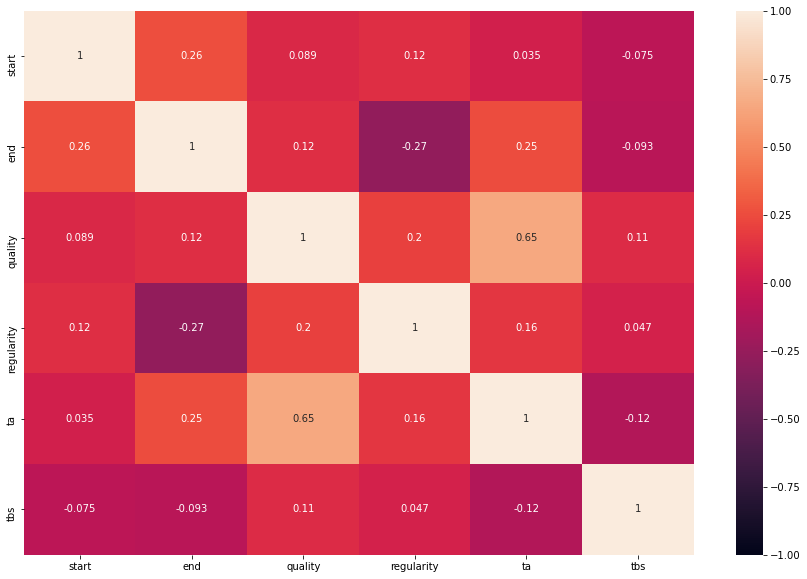

In [131]:
# Matrix Correlation
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(), vmin = -1, vmax = 1, annot = True);

## Normalisasi Data

In [148]:
# MinMaxScale Normalization
from sklearn.preprocessing import MinMaxScaler

MMScaler = MinMaxScaler()
df_norm = MMScaler.fit_transform(df2)
df_norm = pd.DataFrame(df_norm, columns=df2.columns)
df_norm.head(5)

,start,end,quality,regularity,ta,tbs
0,0.546980,0.226935,0.849462,0.948718,0.596506,0.025976
1,0.694631,0.229167,0.752688,0.897436,0.473206,0.019891
2,0.696309,0.234375,0.763441,0.923077,0.461154,0.020318
3,0.919463,0.340774,0.698925,0.743590,0.417990,0.021012
4,0.644295,0.235863,0.709677,0.461538,0.506547,0.022702


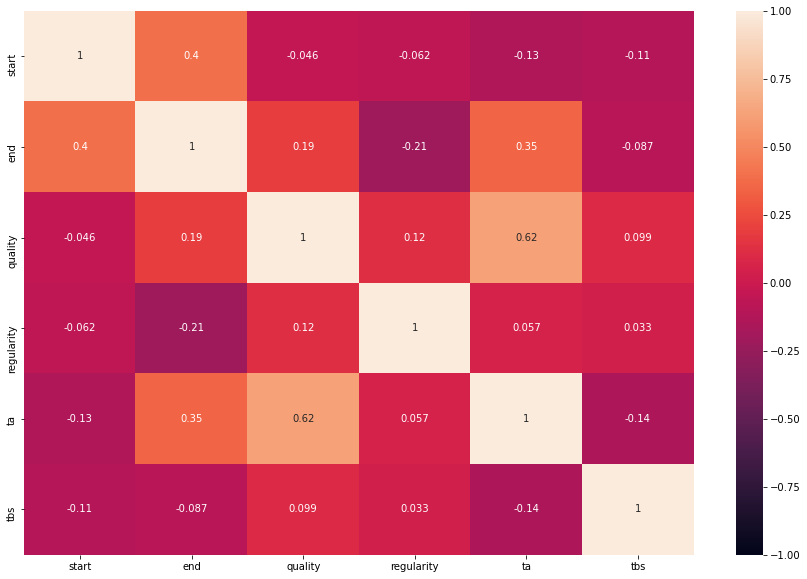

In [149]:
plt.figure(figsize = (15,10))
sns.heatmap(df_norm.corr(), vmin = -1, vmax = 1, annot = True);

Dari heatmap di atas sebenrnya keliatan bahwa  kualitas tidur palign berpengaruh sama durasi tidurnya, hmm

## Things to take in consideration
1. Start time normalisasinya masih min max, mungkin lebih baik di setting minnya jam 6 malem dan maxnya 6 pagi jadi variancenya gaterlalu besar
2. end time juga mungkin sebaiknya gitu meskipun blm tau waktu yang bagusnya gimana
3. Quality mungkin dijadiin categorical biar lebih 'gampang' groupingnya

In [150]:
df_norm.to_csv('sleepdata_extracted.csv')